In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

In [124]:
data = pd.read_csv('train.csv')
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [125]:
data.count()

ClientPeriod                5282
MonthlySpending             5282
TotalSpent                  5282
Sex                         5282
IsSeniorCitizen             5282
HasPartner                  5282
HasChild                    5282
HasPhoneService             5282
HasMultiplePhoneNumbers     5282
HasInternetService          5282
HasOnlineSecurityService    5282
HasOnlineBackup             5282
HasDeviceProtection         5282
HasTechSupportAccess        5282
HasOnlineTV                 5282
HasMovieSubscription        5282
HasContractPhone            5282
IsBillingPaperless          5282
PaymentMethod               5282
Churn                       5282
dtype: int64

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [127]:
catfeatures = ['Sex',
                       'HasPartner',
                       'HasChild',
                       'HasPhoneService',
                       'HasMultiplePhoneNumbers',
                       'HasInternetService',
                       'HasOnlineSecurityService',
                       'HasOnlineBackup',
                       'HasDeviceProtection',
                       'HasTechSupportAccess',
                       'HasOnlineTV',
                       'HasMovieSubscription',
                       'HasContractPhone',
                       'IsBillingPaperless',
                       'PaymentMethod']

So i think data is clear and there is no nan values, but TotalSpent is object not int, that is why i think we will find null values here later.

<Axes: xlabel='Churn', ylabel='Count'>

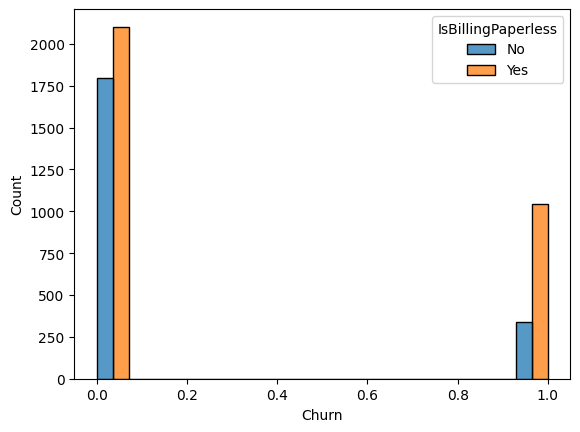

In [128]:
sns.histplot(data = data,hue = "IsBillingPaperless",x = "Churn",multiple="dodge")

<Axes: xlabel='Churn', ylabel='Count'>

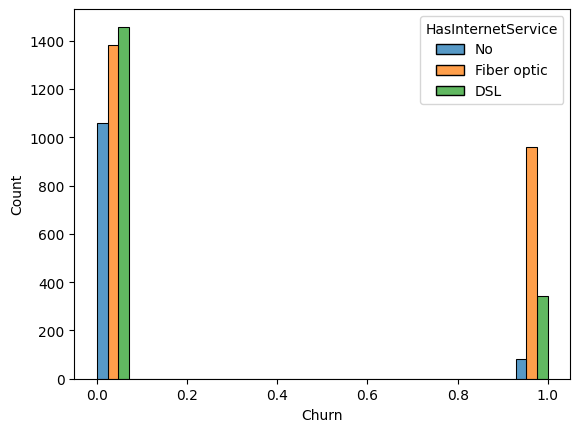

In [129]:
sns.histplot(data = data,hue = "HasInternetService",x = "Churn",multiple="dodge")

Thats can be usefull. As we can see if client has Fiber optic probability is much higher.

<Axes: xlabel='MonthlySpending', ylabel='Count'>

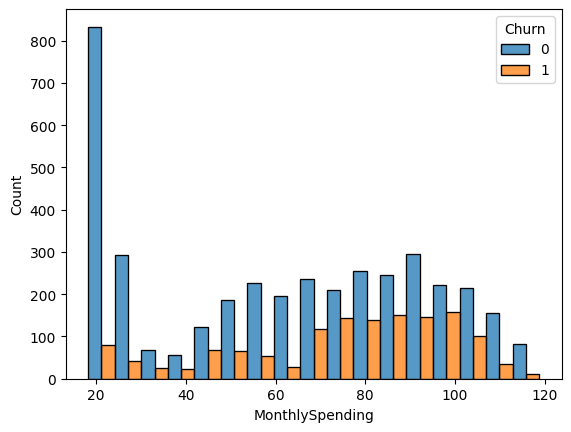

In [130]:
sns.histplot(data = data,x = "MonthlySpending",hue = "Churn",multiple="dodge")

<Axes: xlabel='Churn', ylabel='Count'>

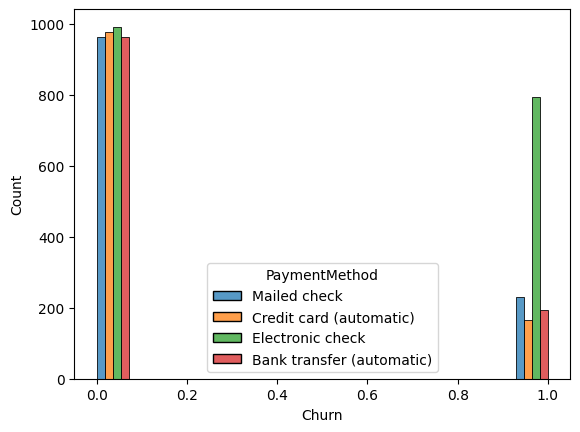

In [131]:
sns.histplot(data = data,hue = "PaymentMethod",x = "Churn",multiple="dodge")

In [132]:
data.where(data['TotalSpent'] == ' ').dropna()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.0,25.75,,Male,0.0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
1707,0.0,73.35,,Female,0.0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0.0
2543,0.0,19.70,,Male,0.0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0.0
3078,0.0,80.85,,Female,0.0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0.0
3697,0.0,20.00,,Female,0.0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
4002,0.0,61.90,,Male,0.0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0.0
4326,0.0,25.35,,Male,0.0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
4551,0.0,52.55,,Female,0.0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0.0
4598,0.0,56.05,,Female,0.0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0.0


In [133]:
filler = data.TotalSpent.where(data['TotalSpent'] != ' ').median()

In [134]:
boostdata = data
data['TotalSpent'] = data['TotalSpent'].where(data['TotalSpent'] != ' ').fillna(filler)
data.TotalSpent = pd.to_numeric(data.TotalSpent)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

<Axes: >

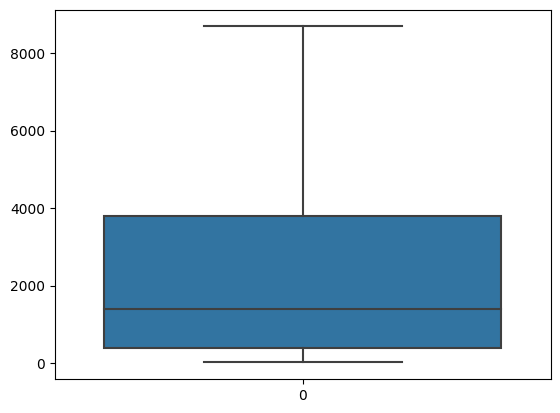

In [135]:
sns.boxplot(data.TotalSpent)

In [136]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [137]:
transformed_columns = pd.DataFrame(enc.fit_transform(data[catfeatures]))
transformed_columns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5278,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5279,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5280,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [138]:
transformed_data = data.drop(catfeatures,axis=1)
transformed_data = transformed_data.join(transformed_columns)
transformed_data.columns = transformed_data.columns.astype(str)
transformed_data

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn,0,1,2,3,4,...,31,32,33,34,35,36,37,38,39,40
0,55,19.50,1026.35,0,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,72,25.85,1872.20,0,0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,75.90,75.90,0,1,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,32,79.30,2570.00,1,0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,115.25,6758.45,0,0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5278,50,44.45,2188.45,0,0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5279,1,55.05,55.05,0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5280,29,76.00,2215.25,0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<Axes: >

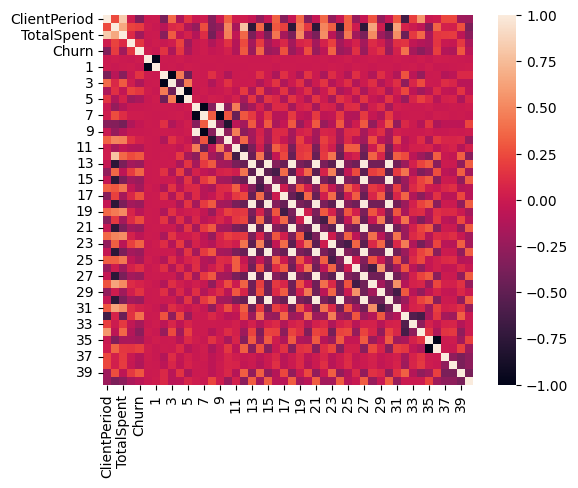

In [139]:
sns.heatmap(transformed_data.corr(),square=True)

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
data_x = transformed_data.drop(columns=['Churn'],axis=1)
data_y = transformed_data.Churn

In [142]:
x_train,x_val,y_train,y_val = train_test_split(data_x,data_y,shuffle=True,test_size=0.3)

In [143]:
liniarModel = LogisticRegression()
liniarModel.fit(x_train,y_train)
pred_liniar = liniarModel.predict(x_val)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
roc_auc_score(pred_liniar,y_val)

0.7540846265939857

In [145]:
Forestmodel = RandomForestClassifier()
params = {'criterion': ['entropy'],
    'max_depth': [8],
    'min_samples_split': [15],
    'min_samples_leaf': [3],
    'n_jobs': [300],}

grid = GridSearchCV(Forestmodel,params)

In [146]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [8],
                         'min_samples_leaf': [3], 'min_samples_split': [15],
                         'n_jobs': [300]})

best estimator RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=15, n_jobs=300) 

In [147]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=15, n_jobs=300)

In [148]:
Forest_pred = grid.predict_proba(x_val)
train_pred_forest = grid.predict_proba(x_train)

In [149]:
roc_auc_score(y_val,Forest_pred[:,1])

0.8507155325074913

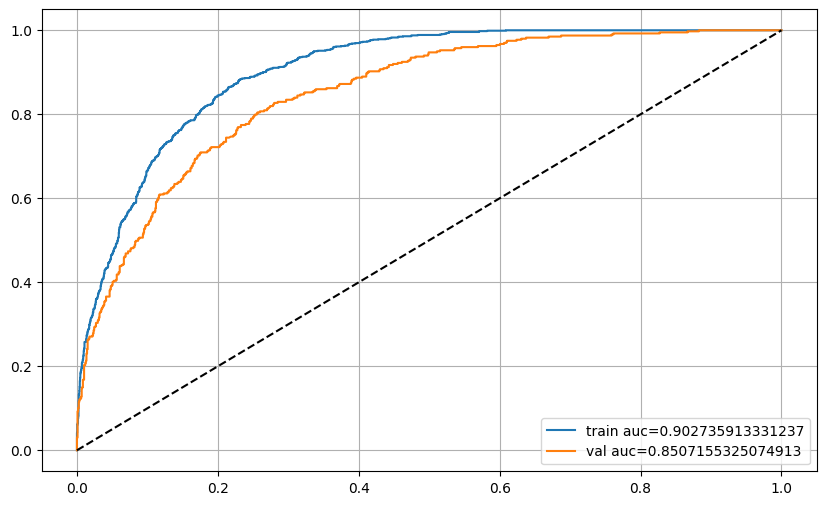

In [150]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train,train_pred_forest[:,1])[:2], 
         label=f'train auc={roc_auc_score(y_train,train_pred_forest[:,1])}')
plt.plot(*roc_curve(y_val, Forest_pred[:,1])[:2],
         label=f'val auc={roc_auc_score(y_val,Forest_pred[:,1])}')


plt.plot([0,1], [0,1], '--', color='black')
plt.legend()
plt.grid()

Lets try to use catboost

In [151]:
import catboost

In [152]:
boostdata['TotalSpent'] = boostdata['TotalSpent'].where(boostdata['TotalSpent'] != ' ').fillna('NAN')

In [153]:
x_train_boost,x_val_boost,y_train_boost,y_val_boost = train_test_split(boostdata.drop(['Churn'],axis=1),boostdata.Churn,test_size=0.3)

In [154]:
train_pool = catboost.Pool(x_train_boost,y_train_boost,cat_features=catfeatures)
val_pool = catboost.Pool(x_val_boost,y_val_boost,cat_features=catfeatures)

In [155]:
depths = np.arange(2,8,1)
boosting_metrics = []

for depth in depths:
    params = {"iterations": 100,
              "depth": depth,
              "loss_function": "Logloss",
              "custom_loss": "AUC",
              "verbose": False}

    scores = catboost.cv(train_pool,params,fold_count=5)
    boosting_metrics.append(scores['test-AUC-mean'][99])

scores

Training on fold [0/5]

bestTest = 0.4220900657
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3998330069
bestIteration = 99

Training on fold [2/5]

bestTest = 0.4399062327
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4424321185
bestIteration = 99

Training on fold [4/5]

bestTest = 0.4192497102
bestIteration = 99

Training on fold [0/5]

bestTest = 0.4152049833
bestIteration = 99

Training on fold [1/5]

bestTest = 0.392991077
bestIteration = 99

Training on fold [2/5]

bestTest = 0.4388465409
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4374229701
bestIteration = 98

Training on fold [4/5]

bestTest = 0.4138098492
bestIteration = 99

Training on fold [0/5]

bestTest = 0.4139676269
bestIteration = 94

Training on fold [1/5]

bestTest = 0.3892092523
bestIteration = 99

Training on fold [2/5]

bestTest = 0.4367030692
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4368577784
bestIteration = 96

Training on fold [4/5]

bestTest = 0.4124866811
b

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.675990,0.001292,0.675494,0.001218,0.779173,0.021343
1,1,0.660267,0.001656,0.659074,0.001819,0.797593,0.025416
2,2,0.645220,0.001662,0.643565,0.001684,0.803007,0.028416
3,3,0.631783,0.002295,0.629552,0.002802,0.805777,0.030172
4,4,0.618807,0.003333,0.616168,0.002664,0.805893,0.031984
...,...,...,...,...,...,...,...
95,95,0.415677,0.022268,0.380908,0.005721,0.845010,0.024289
96,96,0.415658,0.022264,0.380733,0.005855,0.845036,0.024247
97,97,0.415563,0.022377,0.380147,0.005749,0.844977,0.024299
98,98,0.415455,0.022410,0.379610,0.005534,0.844966,0.024230


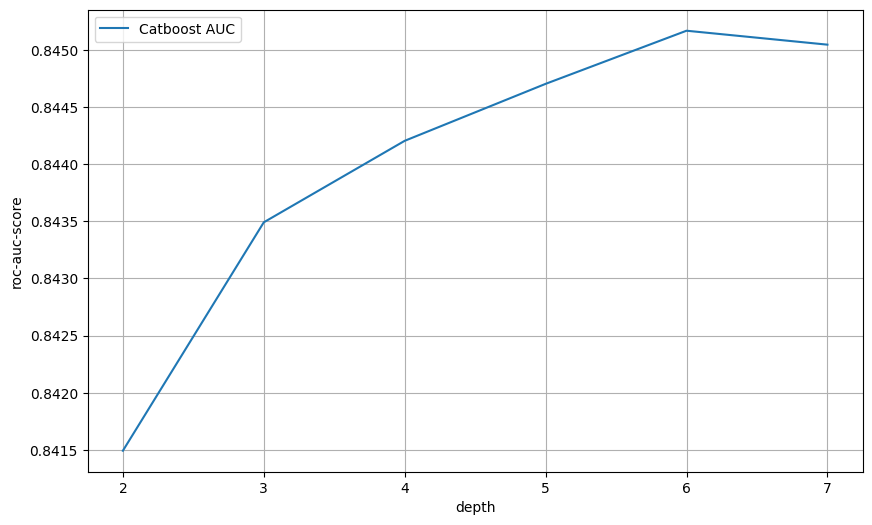

In [156]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(2,8,1), boosting_metrics, label='Catboost AUC')
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()
plt.legend()

In [157]:
cat = catboost.CatBoostClassifier(1000,loss_function='Logloss',verbose=False,depth=6)

In [158]:
cat.fit(train_pool)
on_train = cat.predict_proba(train_pool)
on_val = cat.predict_proba(val_pool)
on_train = on_train[:,1] 
on_val = on_val[:,1] 

In [159]:
train_auc = (roc_auc_score(y_train_boost,on_train))
test_auc =(roc_auc_score(y_val_boost,on_val))

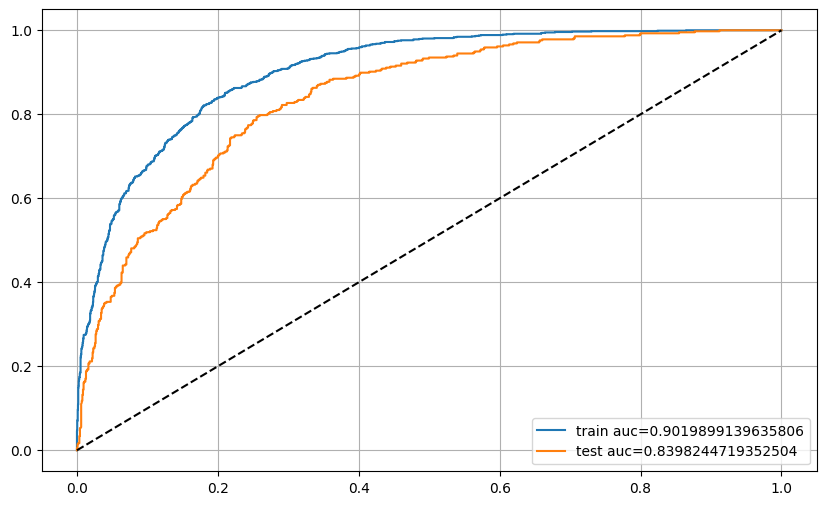

In [160]:
plt.figure(figsize=(10,6))
plt.plot(*roc_curve(y_train_boost, on_train)[:2],label=f'train auc={train_auc}')
plt.plot(*roc_curve(y_val_boost, on_val)[:2],label=f'test auc={test_auc}')

plt.plot([0,1], [0,1], '--', color='black')

plt.legend()
plt.grid()

lets try to make predictions

In [161]:
test = pd.read_csv('test.csv')

In [162]:
test['TotalSpent'] = test['TotalSpent'].where(test['TotalSpent'] != ' ').fillna('NAN')

In [163]:
test_pool = catboost.Pool(test,cat_features=catfeatures)

In [164]:
res = cat.predict_proba(test_pool)

In [165]:
res

array([[0.96420265, 0.03579735],
       [0.18917349, 0.81082651],
       [0.41638597, 0.58361403],
       ...,
       [0.14663156, 0.85336844],
       [0.43516779, 0.56483221],
       [0.99460852, 0.00539148]])

In [166]:
res[:,1]

array([0.03579735, 0.81082651, 0.58361403, ..., 0.85336844, 0.56483221,
       0.00539148])

In [167]:
result = pd.DataFrame(res[:,1],columns=['Churn'])

In [168]:
result.index.names = ['Id']

In [169]:
result.to_csv('submission.csv')

In [170]:
result

,Churn
Id,
0,0.035797
1,0.810827
2,0.583614
3,0.018776
4,0.003511
...,...
1756,0.191117
1757,0.012043
1758,0.853368
